
# Learning from data. Paint with Data. Data as material.

## Working with Seaborn

## Seaborn is a statistical data visualization library

Source: https://www.kaggle.com/learn/data-visualization

https://www.kaggle.com/alexisbcook


### Set up the notebook:

There are a few lines of code that you'll need to run at the top of every notebook to set up your coding environment. It's not important to understand these lines of code now, and so we won't go into the details just yet. (Notice that it returns as output: Setup Complete.)

### More examples with Seaborn can be found here:

https://seaborn.pydata.org/index.html

You can browse the example gallery to see some of the things that you can do with seaborn, and then check out the tutorials or API reference to find out how.

https://seaborn.pydata.org/examples/index.html

#1. Basics

In [31]:
import os
import pandas as pd
pd.plotting.register_matplotlib_converters()

import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

# Where to save the figures
PROJECT_ROOT_DIR = "."
CLASS_ID = "Curious explorer"
IMAGES_PATH = os.path.join(PROJECT_ROOT_DIR, "images", CLASS_ID)
os.makedirs(IMAGES_PATH, exist_ok=True)

def save_fig(fig_id, tight_layout=True, fig_extension="png", resolution=300):
    path = os.path.join(IMAGES_PATH, fig_id + "." + fig_extension)
    print("Saving figure", fig_id)
    if tight_layout:
        plt.tight_layout()
    plt.savefig(path, format=fig_extension, dpi=resolution)

print("Setup Complete")

Setup Complete


### Get the Data from online source

First, download the Data locally as a CVS file and then uplpoad the file in /sample_data



In [32]:
CHOSEN_PATH = os.getcwd()+"/sample_data"
DATAFILE = "best-countries-to-live-in-2024.csv"

def load_chosen_data(chosen_path=CHOSEN_PATH):
    print(CHOSEN_PATH + ".")
    csv_path = os.path.join(chosen_path, DATAFILE)
    return pd.read_csv(csv_path, index_col="country", parse_dates=True)

### Take a quick look at the data structure

In [33]:
chosen_data = load_chosen_data()
chosen_data.head(10)

/content/sample_data.


,population_2024,population_growthRate,land_area,region,unMember,population_density,population_densityMi,share_borders,Hdi2021,Hdi2020,WorldHappiness2022
country,,,,,,,,,,,
India,1441719852,0.00916,3287590,Asia,True,484.9067,1255.9084,"AFG, BGD, BTN, MMR, CHN, NPL, PAK, LKA",0.633,0.642,3.777
China,1425178782,-0.00035,9706961,Asia,True,151.2174,391.6530,"AFG, BTN, MMR, HKG, IND, KAZ, PRK, KGZ, LAO, M...",0.768,0.764,5.585
United States,341814420,0.00535,9372610,North America,True,37.3673,96.7813,"CAN, MEX",0.921,0.920,6.977
Indonesia,279798049,0.00816,1904569,Asia,True,149.0254,385.9758,"TLS, MYS, PNG",0.705,0.709,5.240
Pakistan,245209815,0.01964,881912,Asia,True,318.0908,823.8551,"AFG, CHN, IND, IRN",0.544,0.543,4.516
Nigeria,229152217,0.02389,923768,Africa,True,251.6027,651.6511,"BEN, CMR, TCD, NER",0.535,0.535,4.552
Brazil,217637297,0.00561,8515767,South America,True,26.0390,67.4409,"ARG, BOL, COL, GUF, GUY, PRY, PER, SUR, URY, VEN",0.754,0.758,6.293
Bangladesh,174701211,0.01010,147570,Asia,True,1342.1004,3476.0401,"MMR, IND",0.661,0.655,5.155
Russia,143957079,-0.00337,17098242,Europe,True,8.7903,22.7668,"AZE, BLR, CHN, EST, FIN, GEO, KAZ, PRK, LVA, L...",0.829,0.830,5.459


In [34]:
chosen_data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 141 entries, India to Iceland
Data columns (total 11 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   population_2024        141 non-null    int64  
 1   population_growthRate  141 non-null    float64
 2   land_area              141 non-null    int64  
 3   region                 141 non-null    object 
 4   unMember               141 non-null    bool   
 5   population_density     141 non-null    float64
 6   population_densityMi   141 non-null    float64
 7   share_borders          129 non-null    object 
 8   Hdi2021                141 non-null    float64
 9   Hdi2020                141 non-null    float64
 10  WorldHappiness2022     141 non-null    float64
dtypes: bool(1), float64(6), int64(2), object(2)
memory usage: 12.3+ KB


In [35]:
chosen_data.describe()

,population_2024,population_growthRate,land_area,population_density,population_densityMi,Hdi2021,Hdi2020,WorldHappiness2022
count,1.410000e+02,141.000000,1.410000e+02,141.000000,141.000000,141.000000,141.000000,141.000000
mean,5.422157e+07,0.009327,8.734306e+05,272.742080,706.401985,0.737199,0.737596,5.542582
std,1.749363e+08,0.012112,2.200180e+06,945.620017,2449.155844,0.153844,0.152319,1.105247
min,3.776890e+05,-0.030870,3.160000e+02,2.243100,5.809600,0.394000,0.397000,2.404000
25%,5.494963e+06,0.001180,6.455900e+04,37.367300,96.781300,0.607000,0.610000,4.744000
50%,1.171577e+07,0.008920,2.383910e+05,87.135400,225.680700,0.754000,0.756000,5.578000
75%,3.910705e+07,0.018230,6.522300e+05,170.267800,440.993500,0.875000,0.871000,6.293000
max,1.441720e+09,0.038090,1.709824e+07,8429.956800,21833.588200,0.962000,0.959000,7.821000


<ipython-input-36-a5fb5bfbddd6>:3: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use('seaborn-darkgrid')


Saving figure best-countries-to-live-in-2024.csv


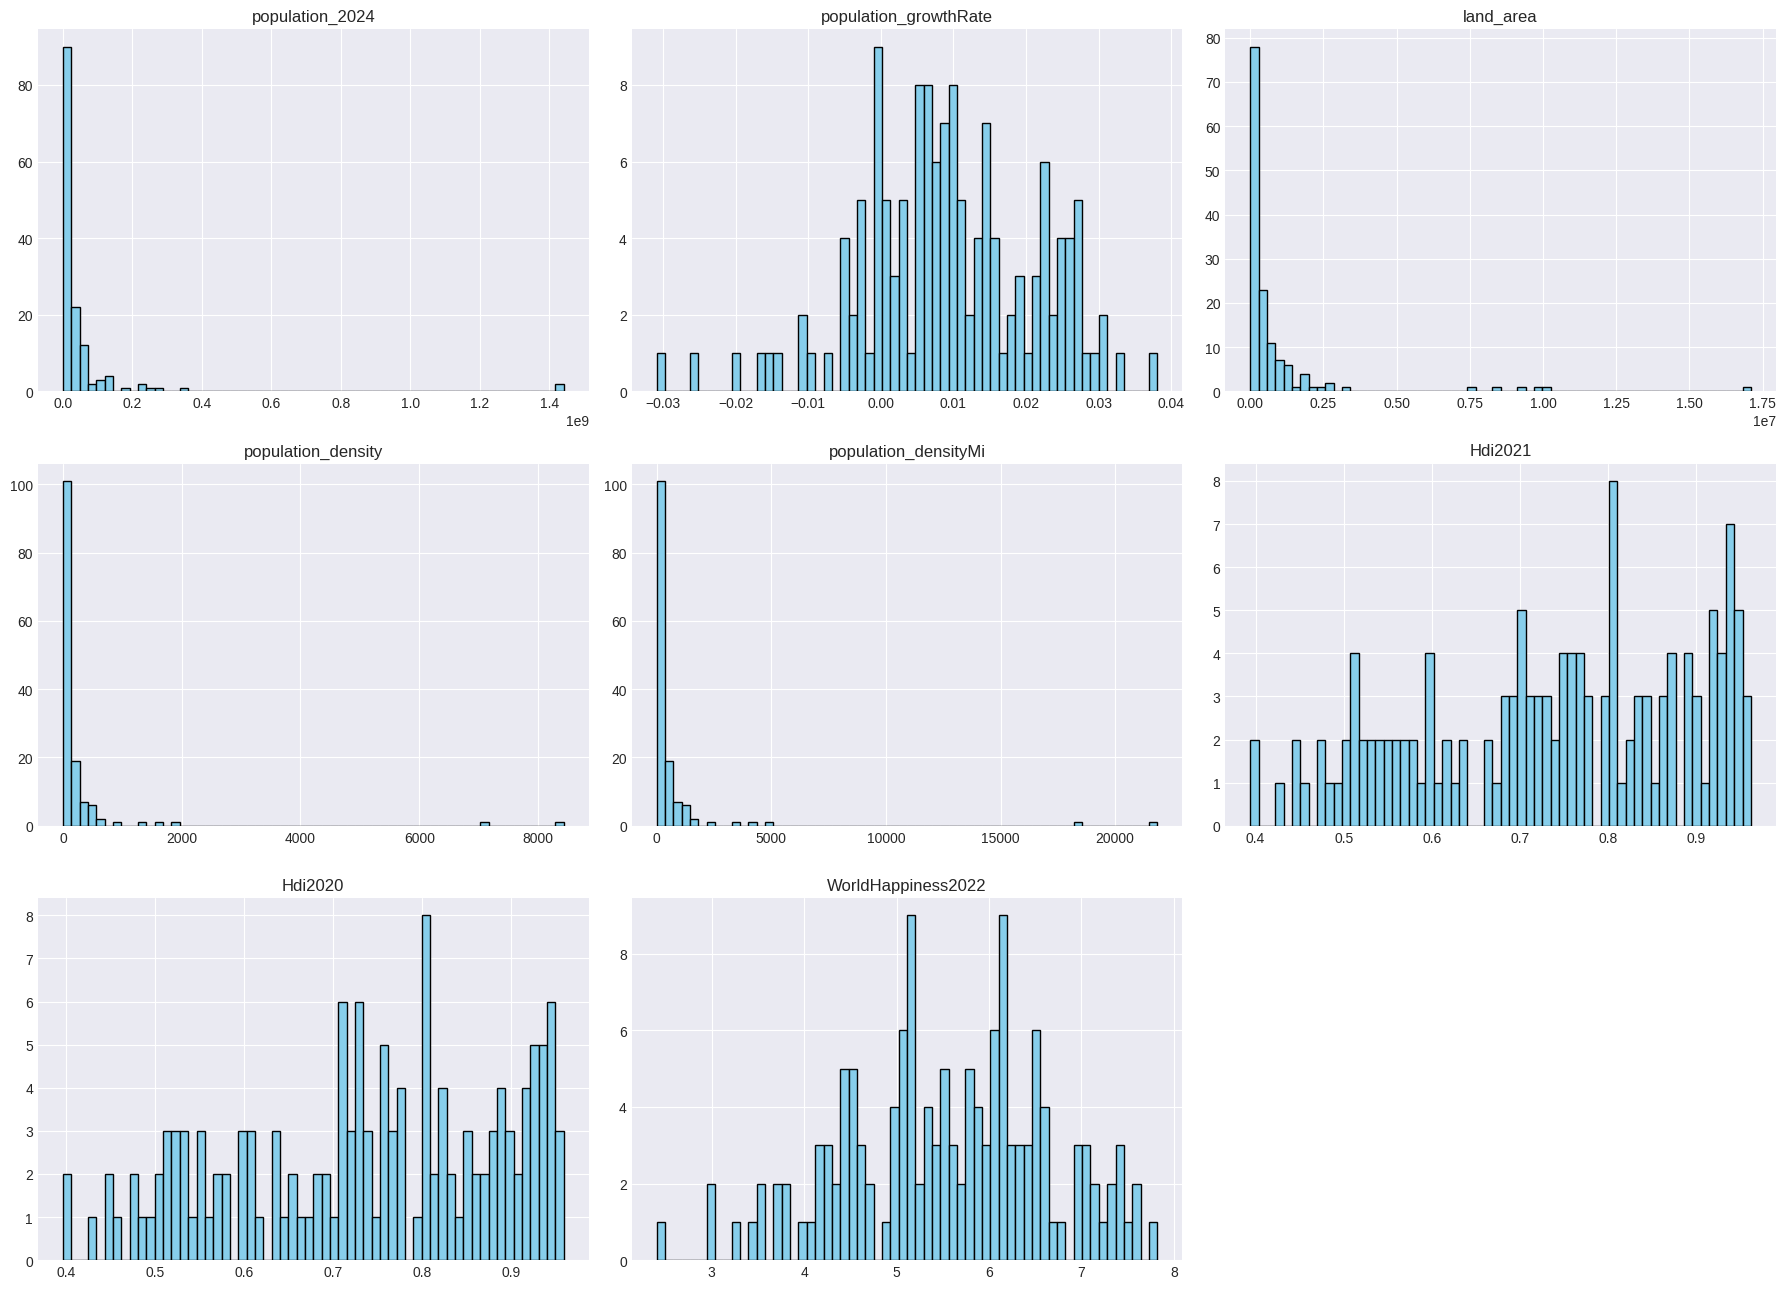

In [36]:
%matplotlib inline
import matplotlib.pyplot as plt
plt.style.use('seaborn-darkgrid')
chosen_data.hist(bins=60, figsize=(18,13), color='skyblue', edgecolor='black')
plt.grid(True)
save_fig(DATAFILE)
plt.show()

In [37]:
#from google.colab import drive
#drive.mount('/content/drive')

### Plot the data

Now that the data is loaded into the notebook, you're ready to visualize it!

Run the next code cell without changes to make a line chart. The code may not make sense yet - you'll learn all about it in the next tutorial!

<Axes: xlabel='country'>

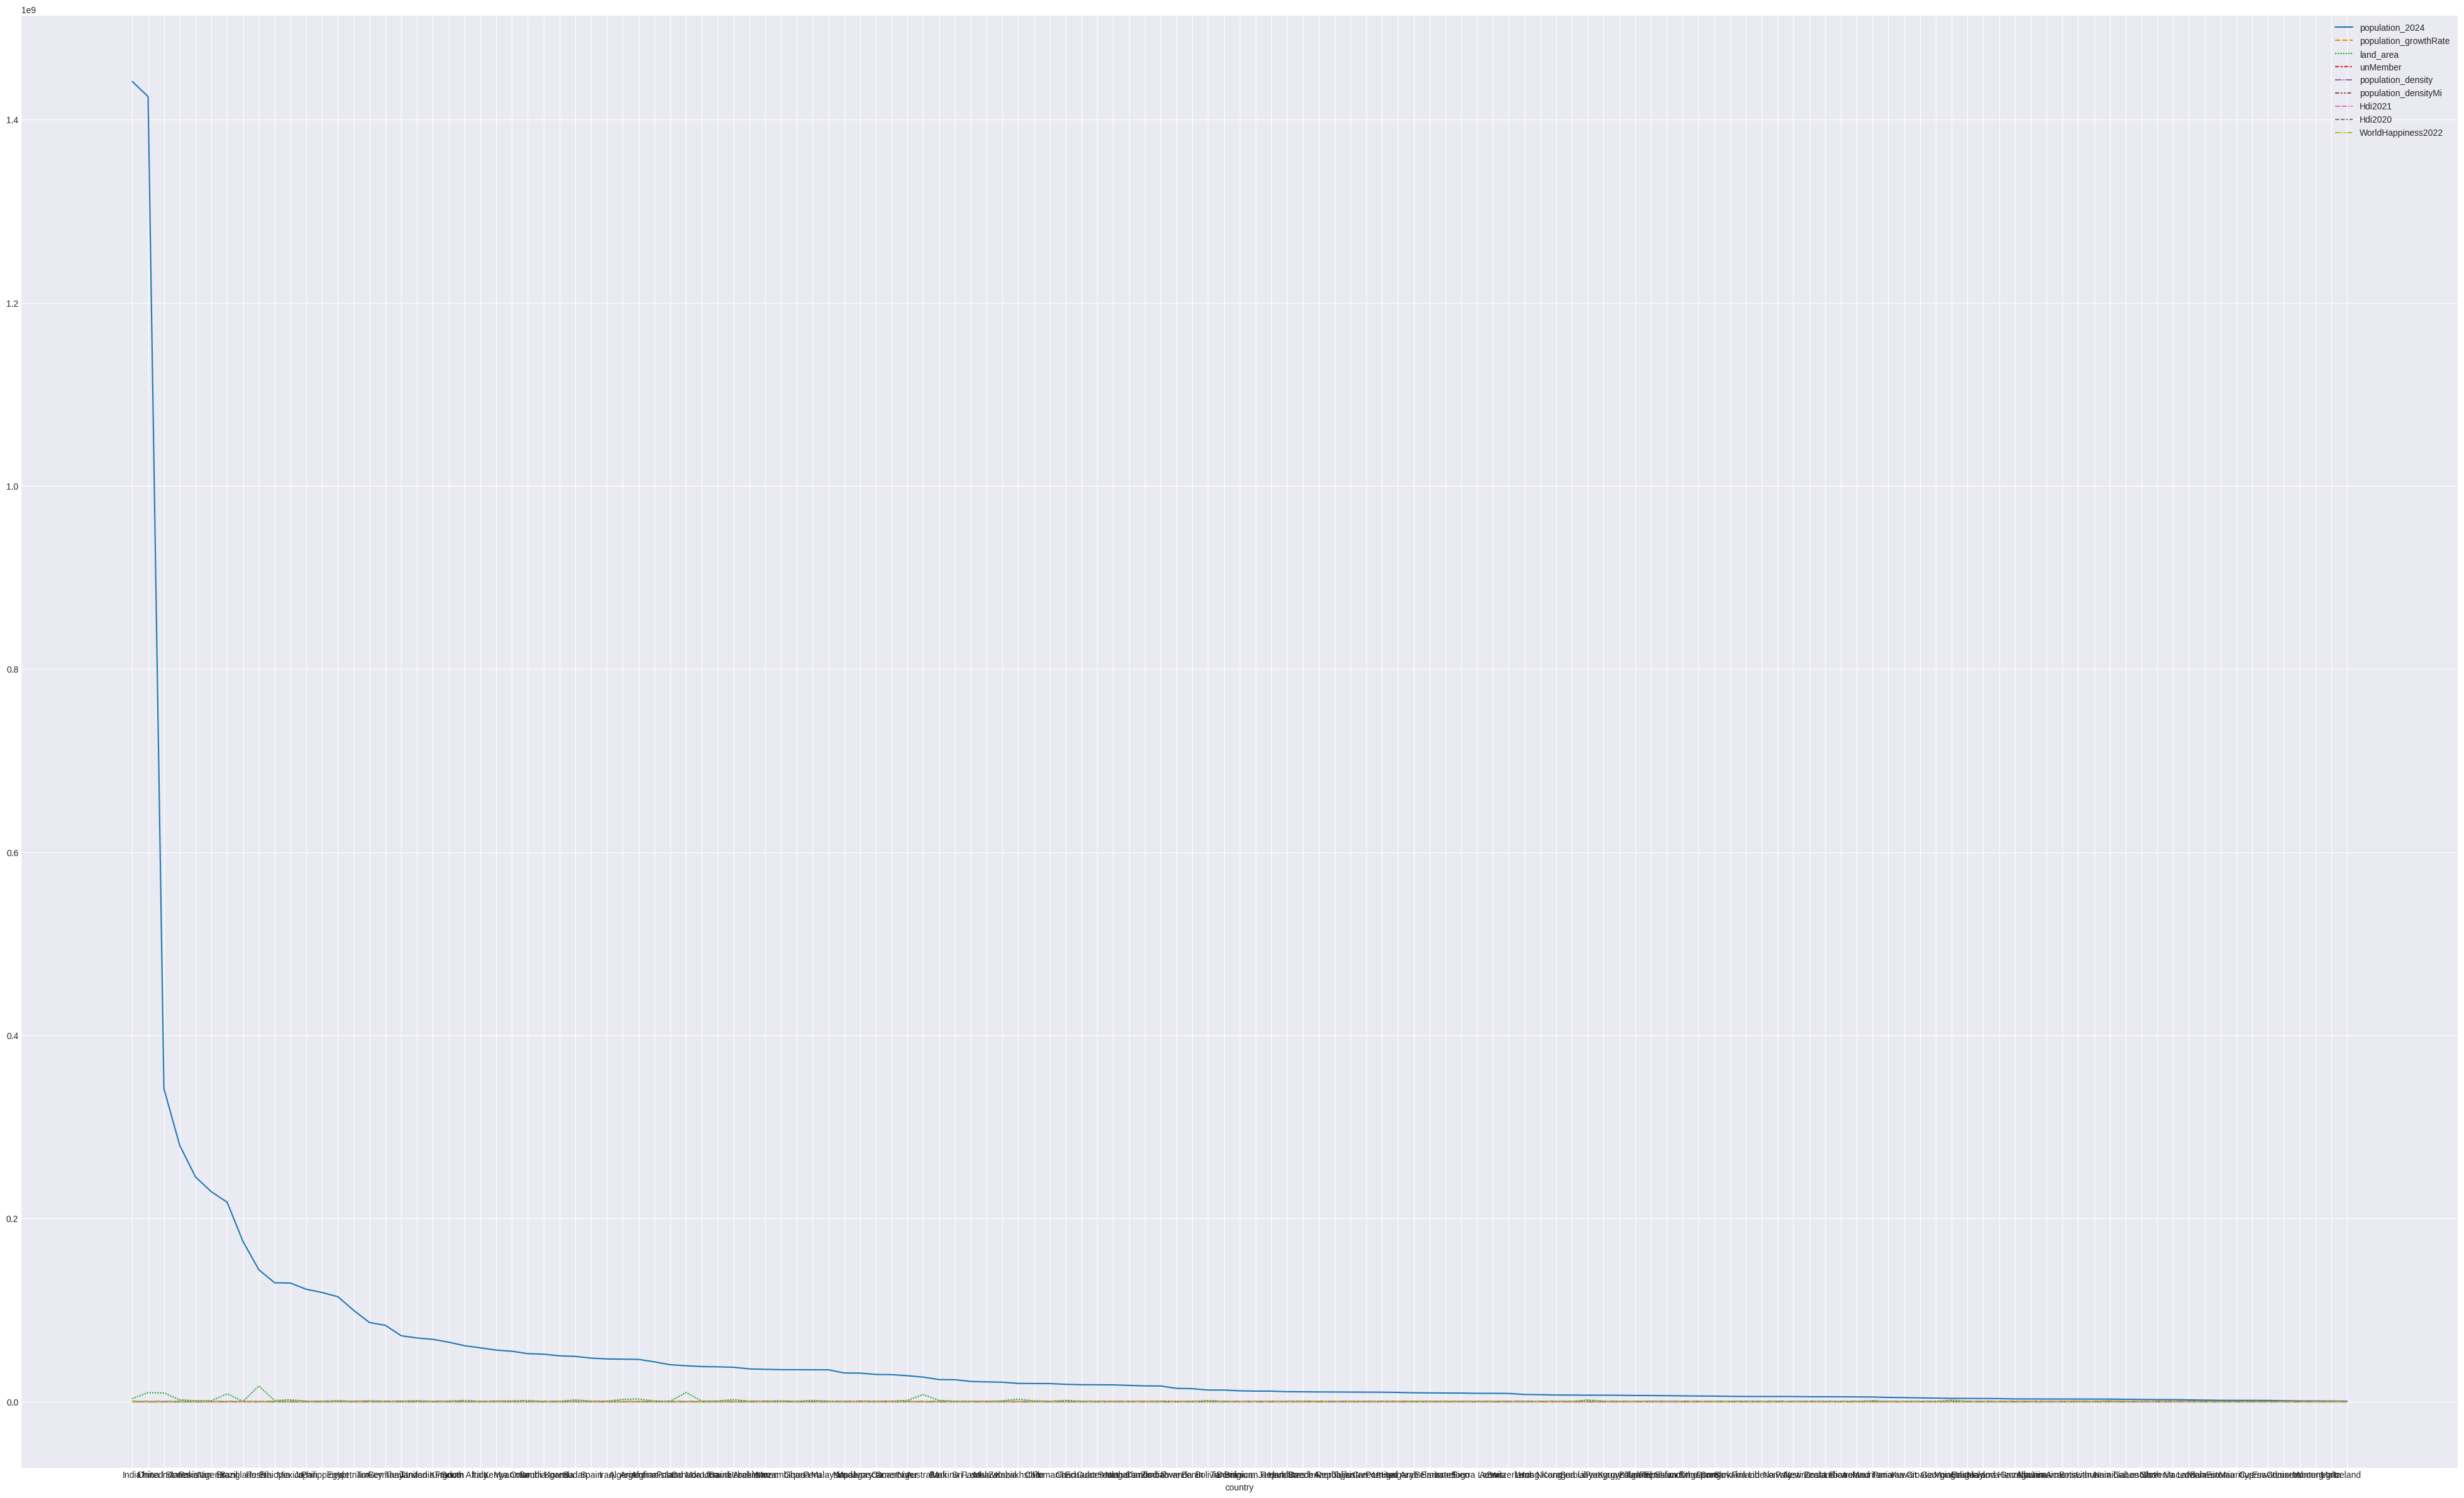

In [38]:
# Set the width and height of the figure
plt.figure(figsize=(50,30))

# Line chart showing how FIFA rankings evolved over time
sns.lineplot(data=chosen_data)

Some questions won't require you to write any code. Instead, you'll interpret visualizations.

As an example, consider the question: Considering only the years represented in the dataset, which countries spent at least 5 consecutive years in the #1 ranked spot?

Solution: The only country that meets this criterion is Brazil (code: BRA), as it maintains the highest ranking in 1996-2000. Other countries do spend some time in the number 1 spot, but Brazil is the only country that maintains it for at least five consecutive years.

### New dataset
The dataset for this tutorial tracks global daily streams on the music streaming service Spotify. We focus on five popular songs from 2017 and 2018:

"Shape of You", by Ed Sheeran (link)
"Despacito", by Luis Fonzi (link)
"Something Just Like This", by The Chainsmokers and Coldplay (link)
"HUMBLE.", by Kendrick Lamar (link)
"Unforgettable", by French Montana (link)

In [39]:
CHOSEN_PATH = os.getcwd()+"/sample_data"
DATAFILE = "best-countries-to-live-in-2024.csv"

def load_chosen_data(chosen_path=CHOSEN_PATH):
    # Path of the file to read
    csv_path = os.path.join(chosen_path, DATAFILE)
    return pd.read_csv(csv_path, index_col="country", parse_dates=True)


# Read the file into a variable spotify_data
spotify_data = load_chosen_data()

### Examine the data
We can print the first five rows of the dataset by using the head command that you learned about in the previous tutorial.

In [40]:
# Print the first 5 rows of the data
spotify_data.head()

,population_2024,population_growthRate,land_area,region,unMember,population_density,population_densityMi,share_borders,Hdi2021,Hdi2020,WorldHappiness2022
country,,,,,,,,,,,
India,1441719852,0.00916,3287590,Asia,True,484.9067,1255.9084,"AFG, BGD, BTN, MMR, CHN, NPL, PAK, LKA",0.633,0.642,3.777
China,1425178782,-0.00035,9706961,Asia,True,151.2174,391.6530,"AFG, BTN, MMR, HKG, IND, KAZ, PRK, KGZ, LAO, M...",0.768,0.764,5.585
United States,341814420,0.00535,9372610,North America,True,37.3673,96.7813,"CAN, MEX",0.921,0.920,6.977
Indonesia,279798049,0.00816,1904569,Asia,True,149.0254,385.9758,"TLS, MYS, PNG",0.705,0.709,5.240
Pakistan,245209815,0.01964,881912,Asia,True,318.0908,823.8551,"AFG, CHN, IND, IRN",0.544,0.543,4.516


Empty entries will appear as NaN, which is short for "Not a Number".

We can also take a look at the last five rows of the data by making only one small change (where .head() becomes .tail()):

In [41]:
# Print the last five rows of the data
spotify_data.tail()

,population_2024,population_growthRate,land_area,region,unMember,population_density,population_densityMi,share_borders,Hdi2021,Hdi2020,WorldHappiness2022
country,,,,,,,,,,,
Comoros,867605,0.01823,1862,Africa,True,466.2037,1207.4675,NaN,0.558,0.562,4.609
Luxembourg,661594,0.01043,2586,Europe,True,256.9796,665.5772,"BEL, FRA, DEU",0.930,0.924,7.404
Montenegro,626102,-0.00061,13812,Europe,True,46.5503,120.5654,"ALB, BIH, HRV, KOS, SRB",0.832,0.826,5.547
Malta,536740,0.00313,316,Europe,True,1677.3125,4344.2394,NaN,0.918,0.911,6.447
Iceland,377689,0.00632,103000,Europe,True,3.7458,9.7016,NaN,0.959,0.957,7.557


### Plot the data
Now that the dataset is loaded into the notebook, we need only one line of code to make a line chart!

<Axes: xlabel='country'>

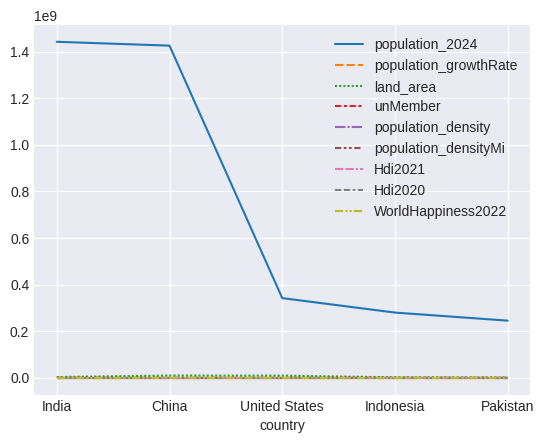

In [42]:
# Line chart showing daily global streams of each song
sns.lineplot(data=spotify_data.head(5))

As you can see above, the line of code is relatively short and has two main components:

sns.lineplot tells the notebook that we want to create a line chart.
Every command that you learn about in this course will start with sns, which indicates that the command comes from the seaborn package. For instance, we use sns.lineplot to make line charts. Soon, you'll learn that we use sns.barplot and sns.heatmap to make bar charts and heatmaps, respectively.
data=spotify_data selects the data that will be used to create the chart.
Note that you will always use this same format when you create a line chart, and the only thing that changes with a new dataset is the name of the dataset. So, if you were working with a different dataset named financial_data, for instance, the line of code would appear as follows:

Sometimes there are additional details we'd like to modify, like the size of the figure and the title of the chart. Each of these options can easily be set with a single line of code.

<Axes: title={'center': 'best-countries-to-live-in-2024'}, xlabel='country'>

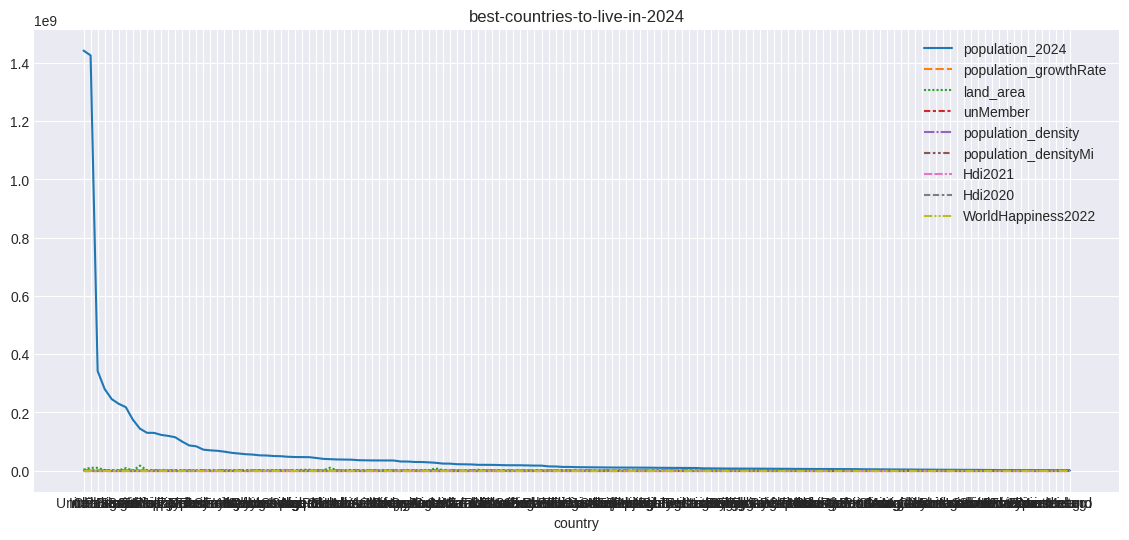

In [43]:
# Set the width and height of the figure
plt.figure(figsize=(14,6))

# Add title
plt.title("best-countries-to-live-in-2024")

# Line chart showing daily global streams of each song
sns.lineplot(data=spotify_data)

The first line of code sets the size of the figure to 14 inches (in width) by 6 inches (in height). To set the size of any figure, you need only copy the same line of code as it appears. Then, if you'd like to use a custom size, change the provided values of 14 and 6 to the desired width and height.

The second line of code sets the title of the figure. Note that the title must always be enclosed in quotation marks ("...")!



### Plot a subset of the data
So far, you've learned how to plot a line for every column in the dataset. In this section, you'll learn how to plot a subset of the columns.

We'll begin by printing the names of all columns. This is done with one line of code and can be adapted for any dataset by just swapping out the name of the dataset (in this case, spotify_data).



In [44]:
list(spotify_data.columns)

['population_2024',
 'population_growthRate',
 'land_area',
 'region',
 'unMember',
 'population_density',
 'population_densityMi',
 'share_borders',
 'Hdi2021',
 'Hdi2020',
 'WorldHappiness2022']

In the next code cell, we plot the lines corresponding to the first two columns in the dataset.

In [45]:
print(spotify_data.columns)

Index(['population_2024', 'population_growthRate', 'land_area', 'region',
       'unMember', 'population_density', 'population_densityMi',
       'share_borders', 'Hdi2021', 'Hdi2020', 'WorldHappiness2022'],
      dtype='object')


Text(0.5, 0, 'country')

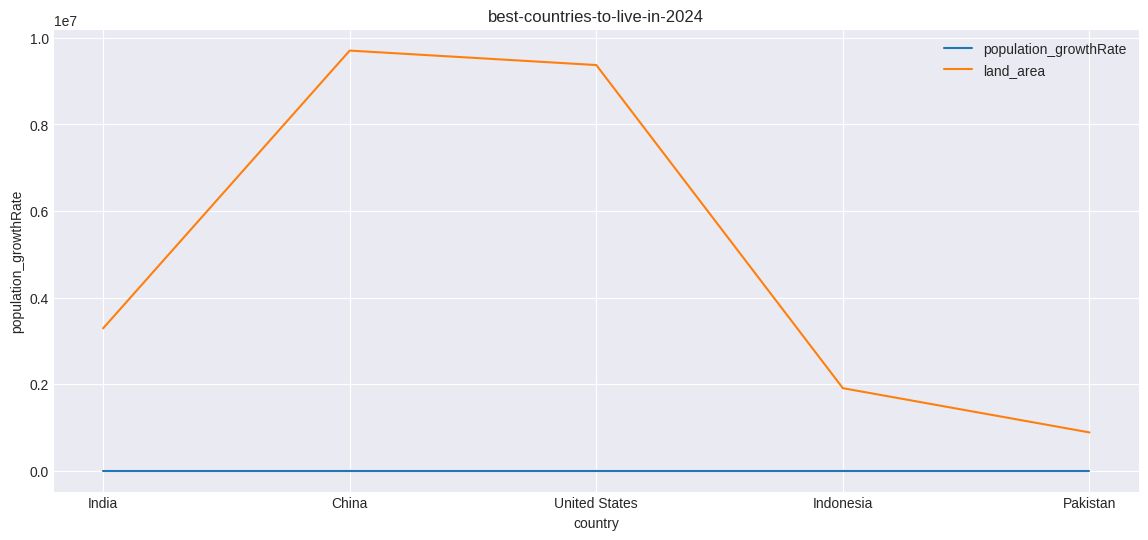

In [46]:
# Set the width and height of the figure
plt.figure(figsize=(14,6))

# Add title
plt.title("best-countries-to-live-in-2024")

# Line chart showing daily global streams of 'Shape of You'
sns.lineplot(data=spotify_data.head()['population_growthRate'], label="population_growthRate")

# Line chart showing daily global streams of 'Despacito'
sns.lineplot(data=spotify_data.head()['land_area'], label="land_area")

# Add label for horizontal axis
plt.xlabel("country")

The first two lines of code set the title and size of the figure (and should look very familiar!).

The next two lines each add a line to the line chart. For instance, consider the first one, which adds the line for "Shape of You":

<Axes: xlabel='country', ylabel='Hdi2021'>

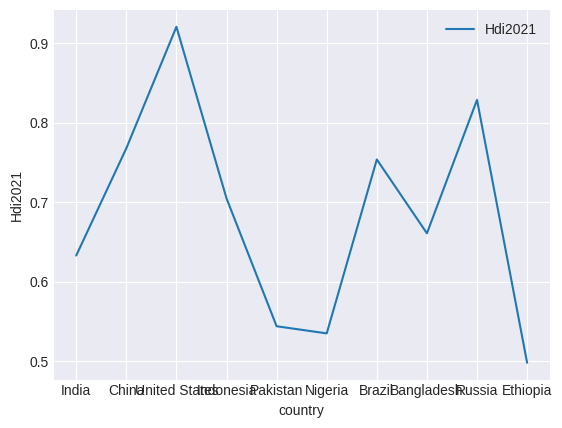

In [47]:
# Line chart showing daily global streams of 'Shape of You'
sns.lineplot(data=spotify_data.head(10)['Hdi2021'], label="Hdi2021")

This line looks really similar to the code we used when we plotted every line in the dataset, but it has a few key differences:

Instead of setting data=spotify_data, we set data=spotify_data['Shape of You']. In general, to plot only a single column, we use this format with putting the name of the column in single quotes and enclosing it in square brackets. (To make sure that you correctly specify the name of the column, you can print the list of all column names using the command you learned above.)
We also add label="Shape of You" to make the line appear in the legend and set its corresponding label.
The final line of code modifies the label for the horizontal axis (or x-axis), where the desired label is placed in quotation marks ("...").

#2. Exercise: Line Charts

In this exercise, you will use your new knowledge to propose a solution to a real-world scenario. To succeed, you will need to import data into Python, answer questions using the data, and generate **line charts** to understand patterns in the data.

## Scenario

You have recently been hired to manage the museums in the City of Los Angeles. Your first project focuses on the four museums pictured in the images below.

![ex1_museums](https://storage.googleapis.com/kaggle-media/learn/images/pFYL8J1.png)

You will leverage data from the Los Angeles [Data Portal](https://data.lacity.org/) that tracks monthly visitors to each museum.  

![ex1_xlsx](https://storage.googleapis.com/kaggle-media/learn/images/mGWYlym.png)

## Setup

Run the next cell to import and configure the Python libraries that you need to complete the exercise.

In [48]:
import pandas as pd
pd.plotting.register_matplotlib_converters()
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
print("Setup Complete")

Setup Complete


In [49]:
# Set up code checking
import os
if not os.path.exists("./sample_data/museum_visitors.csv"):
    os.symlink("../sample_data/data-for-datavis/museum_visitors.csv", "../sample_data/museum_visitors.csv")

print("Setup Complete")

Setup Complete


## Step 1: Load the data

Your first assignment is to read the LA Museum Visitors data file into `museum_data`.  Note that:
- The filepath to the dataset is stored as `museum_filepath`.  Please **do not** change the provided value of the filepath.
- The name of the column to use as row labels is `"Date"`.  (This can be seen in cell A1 when the file is opened in Excel.)

To help with this, you may find it useful to revisit some relevant code from the tutorial, which we have pasted below:

```python
# Path of the file to read
spotify_filepath = "./sample_data/spotify.csv"

# Read the file into a variable spotify_data
spotify_data = pd.read_csv(spotify_filepath, index_col="Date", parse_dates=True)
```

The code you need to write now looks very similar!

In [50]:
# Path of the file to read
museum_filepath = "./sample_data/museum_visitors.csv"

# Fill in the line below to read the file into a variable museum_data
museum_data =pd.read_csv(museum_filepath)


## Step 2: Review the data

Use a Python command to print the last 5 rows of the data.

In [51]:
# Print the last five rows of the data
museum_data.tail()

,Date,Avila Adobe,Firehouse Museum,Chinese American Museum,America Tropical Interpretive Center
54,2018-07-01,23136,4191,2620,4718
55,2018-08-01,20815,4866,2409,3891
56,2018-09-01,21020,4956,2146,3180
57,2018-10-01,19280,4622,2364,3775
58,2018-11-01,17163,4082,2385,4562


The last row (for `2018-11-01`) tracks the number of visitors to each museum in November 2018, the next-to-last row (for `2018-10-01`) tracks the number of visitors to each museum in October 2018, _and so on_.

Use the last 5 rows of the data to answer the questions below.

In [52]:
# Fill in the line below: How many visitors did the Chinese American Museum
# receive in July 2018?

ca_museum_jul18 = museum_data[(museum_data['Chinese American Museum']) & (museum_data['Date'].dt.month == 7) & (museum_data['Date'].dt.year == 2018)].sum(numeric_only=True)
# Fill in the line below: In October 2018, how many more visitors did Avila
# Adobe receive than the Firehouse Museum?
avila_oct18 = museum_data[(museum_data['Date'].dt.month == 10) & (museum_data['Date'].dt.year == 2018)]['Avila Adobe'].sum(numeric_only=True) - museum_data[(museum_data['Date'].dt.month == 10) & (museum_data['Date'].dt.year == 2018)]['Firehouse Museum'].sum(numeric_only=True)

AttributeError: Can only use .dt accessor with datetimelike values

## Step 3: Convince the museum board

The Firehouse Museum claims they ran an event in 2014 that brought an incredible number of visitors, and that they should get extra budget to run a similar event again.  The other museums think these types of events aren't that important, and budgets should be split purely based on recent visitors on an average day.  

To show the museum board how the event compared to regular traffic at each museum, create a line chart that shows how the number of visitors to each museum evolved over time.  Your figure should have four lines (one for each museum).

> **(Optional) Note**: If you have some prior experience with plotting figures in Python, you might be familiar with the `plt.show()` command.

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# 设置图形大小
plt.figure(figsize=(14, 8))

# 使用Seaborn的lineplot绘制折线图
sns.lineplot(x='Date', y='Chinese American Museum', data=museum_data)

# 添加标题和标签
plt.title('Number of Visitors to Each Museum Over Time')
plt.xlabel('Date')
plt.ylabel('Number of Visitors')

# 显示图例
plt.legend()

# 显示图形
plt.show()


## Step 4: Assess seasonality

When meeting with the employees at Avila Adobe, you hear that one major pain point is that the number of museum visitors varies greatly with the seasons, with low seasons (when the employees are perfectly staffed and happy) and also high seasons (when the employees are understaffed and stressed).  You realize that if you can predict these high and low seasons, you can plan ahead to hire some additional seasonal employees to help out with the extra work.

#### Part A
Create a line chart that shows how the number of visitors to Avila Adobe has evolved over time.  (_If your code returns an error, the first thing that you should check is that you've spelled the name of the column correctly!  You must write the name of the column exactly as it appears in the dataset._)

In [ ]:
# Line plot showing the number of visitors to Avila Adobe over time
____ # Your code here

#### Part B

Does Avila Adobe get more visitors:
- in September-February (in LA, the fall and winter months), or
- in March-August (in LA, the spring and summer)?  

Using this information, when should the museum staff additional seasonal employees?

#3. Bar Charts and Heatmaps
Use color or length to compare categories in a dataset

Now that you can create your own line charts, it's time to learn about more chart types!

By the way, if this is your first experience with writing code in Python, you should be very proud of all that you have accomplished so far, because it's never easy to learn a completely new skill! If you stick with the course, you'll notice that everything will only get easier (while the charts you'll build will get more impressive!), since the code is pretty similar for all of the charts. Like any skill, coding becomes natural over time, and with repetition.

In this tutorial, you'll learn about bar charts and heatmaps.

##Set up the notebook
As always, we begin by setting up the coding environment.

In [ ]:
import pandas as pd
pd.plotting.register_matplotlib_converters()
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
print("Setup Complete")

Select a dataset
In this tutorial, we'll work with a dataset from the US Department of Transportation that tracks flight delays.

Opening this CSV file in Excel shows a row for each month (where 1 = January, 2 = February, etc) and a column for each airline code.



Each entry shows the average arrival delay (in minutes) for a different airline and month (all in year 2015). Negative entries denote flights that (on average) tended to arrive early. For instance, the average American Airlines flight (airline code: AA) in January arrived roughly 7 minutes late, and the average Alaska Airlines flight (airline code: AS) in April arrived roughly 3 minutes early.

##Load the data
As before, we load the dataset using the pd.read_csv command.

In [ ]:
# Path of the file to read
flight_filepath = "./sample_data/flight.csv"

# Read the file into a variable flight_data
flight_data = pd.read_csv(flight_filepath, index_col="Month")

You may notice that the code is slightly shorter than what we used in the previous tutorial. In this case, since the row labels (from the 'Month' column) don't correspond to dates, we don't add parse_dates=True in the parentheses. But, we keep the first two pieces of text as before, to provide both:

the filepath for the dataset (in this case, flight_filepath), and
the name of the column that will be used to index the rows (in this case, index_col="Month").


#Examine the data

Since the dataset is small, we can easily print all of its contents. This is done by writing a single line of code with just the name of the dataset.

In [ ]:
# Print the data
flight_data

#Bar chart
Say we'd like to create a bar chart showing the average arrival delay for Spirit Airlines (airline code: NK) flights, by month.

In [ ]:
# Path of the file to read
flight_filepath = "./sample_data/flight_delays.csv"

# Read the file into a variable flight_data
flight_data = pd.read_csv(flight_filepath, index_col="Month")

# Print the data
flight_data

# Set the width and height of the figure
plt.figure(figsize=(10,6))

# Add title
plt.title("Average Arrival Delay for Spirit Airlines Flights, by Month")

# Bar chart showing average arrival delay for Spirit Airlines flights by month
sns.barplot(x=flight_data.index, y=flight_data['NK'])

# Add label for vertical axis
plt.ylabel("Arrival delay (in minutes)")

The commands for customizing the text (title and vertical axis label) and size of the figure are familiar from the previous tutorial. The code that creates the bar chart is new:

In [ ]:
# Bar chart showing average arrival delay for Spirit Airlines flights by month
sns.barplot(x=flight_data.index, y=flight_data['NK'])

The commands for customizing the text (title and vertical axis label) and size of the figure are familiar from the previous tutorial. The code that creates the bar chart is new:


Bar chart showing average arrival delay for Spirit Airlines flights by month
```
sns.barplot(x=flight_data.index, y=flight_data['NK'])
```
It has three main components:

sns.barplot - This tells the notebook that we want to create a bar chart.
Remember that sns refers to the seaborn package, and all of the commands that you use to create charts in this course will start with this prefix.

x=flight_data.index - This determines what to use on the horizontal axis. In this case, we have selected the column that indexes the rows (in this case, the column containing the months).

y=flight_data['NK'] - This sets the column in the data that will be used to determine the height of each bar. In this case, we select the 'NK' column.

Important Note: You must select the indexing column with flight_data.index, and it is not possible to use flight_data['Month'] (which will return an error). This is because when we loaded the dataset, the "Month" column was used to index the rows. We always have to use this special notation to select the indexing column.

#Heatmap
We have one more plot type to learn about: heatmaps!

In the code cell below, we create a heatmap to quickly visualize patterns in flight_data. Each cell is color-coded according to its corresponding value.

In [ ]:
# Set the width and height of the figure
plt.figure(figsize=(14,7))

# Add title
plt.title("Average Arrival Delay for Each Airline, by Month")

# Heatmap showing average arrival delay for each airline by month
sns.heatmap(data=flight_data, annot=True)

# Add label for horizontal axis
plt.xlabel("Airline")



```
# This is formatted as code
```



The relevant code to create the heatmap is as follows:
```
# Heatmap showing average arrival delay for each airline by month
sns.heatmap(data=flight_data, annot=True)
```
This code has three main components:

- sns.heatmap - This tells the notebook that we want to create a heatmap.

- data=flight_data - This tells the notebook to use all of the entries in flight_data to create the heatmap.

- annot=True - This ensures that the values for each cell appear on the chart.
(Leaving this out removes the numbers from each of the cells!)

What patterns can you detect in the table? For instance, if you look closely, the months toward the end of the year (especially months 9-11) appear relatively dark for all airlines. This suggests that airlines are better (on average) at keeping schedule during these months!

#Exercise: Bar Charts and Heatmaps

In this exercise, you will use your new knowledge to propose a solution to a real-world scenario.  To succeed, you will need to import data into Python, answer questions using the data, and generate **bar charts** and **heatmaps** to understand patterns in the data.

## Scenario

You've recently decided to create your very own video game!  As an avid reader of [IGN Game Reviews](https://www.ign.com/reviews/games), you hear about all of the most recent game releases, along with the ranking they've received from experts, ranging from 0 (_Disaster_) to 10 (_Masterpiece_).

![ex2_ign](https://storage.googleapis.com/kaggle-media/learn/images/Oh06Fu1.png)

You're interested in using [IGN reviews](https://www.ign.com/reviews/games) to guide the design of your upcoming game.  Thankfully, someone has summarized the rankings in a really useful CSV file that you can use to guide your analysis.

## Setup

Run the next cell to import and configure the Python libraries that you need to complete the exercise.

In [ ]:
import pandas as pd
pd.plotting.register_matplotlib_converters()
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
print("Setup Complete")

## Step 1: Load the data

Read the IGN data file into `ign_data`.  Use the `"Platform"` column to label the rows.

In [ ]:
# Path of the file to read
ign_filepath = "./sample_data/ign_scores.csv"

# Fill in the line below to read the file into a variable ign_data
ign_data = pd.read_csv(file_path)


## Step 2: Review the data

Use a Python command to print the entire dataset.

In [ ]:
# Print the data
____ # Your code here

The dataset that you've just printed shows the average score, by platform and genre.  Use the data to answer the questions below.

In [ ]:
# Fill in the line below: What is the highest average score received by PC games,
# for any genre?
high_score = ____

# Fill in the line below: On the Playstation Vita platform, which genre has the
# lowest average score? Please provide the name of the column, and put your answer
# in single quotes (e.g., 'Action', 'Adventure', 'Fighting', etc.)
worst_genre = ____

## Step 3: Which platform is best?

Since you can remember, your favorite video game has been [**Mario Kart Wii**](https://www.ign.com/games/mario-kart-wii), a racing game released for the Wii platform in 2008.  And, IGN agrees with you that it is a great game -- their rating for this game is a whopping 8.9!  Inspired by the success of this game, you're considering creating your very own racing game for the Wii platform.

#### Part A

Create a bar chart that shows the average score for **racing** games, for each platform.  Your chart should have one bar for each platform.

In [ ]:
# Bar chart showing average score for racing games by platform
____ # Your code here

#### Part B

Based on the bar chart, do you expect a racing game for the **Wii** platform to receive a high rating?  If not, what gaming platform seems to be the best alternative?

## Step 4: All possible combinations!

Eventually, you decide against creating a racing game for Wii, but you're still committed to creating your own video game!  Since your gaming interests are pretty broad (_... you generally love most video games_), you decide to use the IGN data to inform your new choice of genre and platform.

#### Part A

Use the data to create a heatmap of average score by genre and platform.

In [ ]:
# Heatmap showing average game score by platform and genre
____ # Your code here

#### Part B

Which combination of genre and platform receives the highest average ratings?  Which combination receives the lowest average rankings?

#4. Scatter Plots
Leverage the coordinate plane to explore relationships between variables

In this tutorial, you'll learn how to create advanced scatter plots.

Set up the notebook
As always, we begin by setting up the coding environment.

In [ ]:
import pandas as pd
pd.plotting.register_matplotlib_converters()
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
print("Setup Complete")

##Load and examine the data
We'll work with a (synthetic) dataset of insurance charges, to see if we can understand why some customers pay more than others.

If you like, you can read more about the dataset [here](https://www.kaggle.com/datasets/mirichoi0218/insurance).

In [ ]:
# Path of the file to read
insurance_filepath = "./sample_data/insurance.csv"

# Read the file into a variable insurance_data
insurance_data = pd.read_csv(insurance_filepath)

As always, we check that the dataset loaded properly by printing the first five rows.

In [ ]:
insurance_data.head()

##Scatter plots

To create a simple scatter plot, we use the sns.scatterplot command and specify the values for:

- the horizontal x-axis (x=insurance_data['bmi']), and
- the vertical y-axis (y=insurance_data['charges']).

In [ ]:
sns.scatterplot(x=insurance_data['bmi'], y=insurance_data['charges'])

The scatterplot above suggests that body mass index (BMI) and insurance charges are positively correlated, where customers with higher BMI typically also tend to pay more in insurance costs. (This pattern makes sense, since high BMI is typically associated with higher risk of chronic disease.)

To double-check the strength of this relationship, you might like to add a regression line, or the line that best fits the data. We do this by changing the command to sns.regplot.

In [ ]:
sns.regplot(x=insurance_data['bmi'], y=insurance_data['charges'])

##Color-coded scatter plots
We can use scatter plots to display the relationships between (not two, but...) three variables! One way of doing this is by color-coding the points.

For instance, to understand how smoking affects the relationship between BMI and insurance costs, we can color-code the points by 'smoker', and plot the other two columns ('bmi', 'charges') on the axes.

In [ ]:
sns.scatterplot(x=insurance_data['bmi'], y=insurance_data['charges'], hue=insurance_data['smoker'])

This scatter plot shows that while nonsmokers to tend to pay slightly more with increasing BMI, smokers pay MUCH more.

To further emphasize this fact, we can use the sns.lmplot command to add two regression lines, corresponding to smokers and nonsmokers. (You'll notice that the regression line for smokers has a much steeper slope, relative to the line for nonsmokers!)

In [ ]:
sns.lmplot(x="bmi", y="charges", hue="smoker", data=insurance_data)

The sns.lmplot command above works slightly differently than the commands you have learned about so far:

- Instead of setting x=insurance_data['bmi'] to select the 'bmi' column in insurance_data, we set x="bmi" to specify the name of the column only.
- Similarly, y="charges" and hue="smoker" also contain the names of columns.
- We specify the dataset with data=insurance_data.

Finally, there's one more plot that you'll learn about, that might look slightly different from how you're used to seeing scatter plots. Usually, we use scatter plots to highlight the relationship between two continuous variables (like "bmi" and "charges"). However, we can adapt the design of the scatter plot to feature a categorical variable (like "smoker") on one of the main axes. We'll refer to this plot type as a categorical scatter plot, and we build it with the sns.swarmplot command.

In [ ]:
sns.swarmplot(x=insurance_data['smoker'],
              y=insurance_data['charges'])

Among other things, this plot shows us that:

on average, non-smokers are charged less than smokers, and
the customers who pay the most are smokers; whereas the customers who pay the least are non-smokers.

#Exercise: Scatter Plots

In this exercise, you will use your new knowledge to propose a solution to a real-world scenario.  To succeed, you will need to import data into Python, answer questions using the data, and generate **scatter plots** to understand patterns in the data.

## Scenario

You work for a major candy producer, and your goal is to write a report that your company can use to guide the design of its next product.  Soon after starting your research, you stumble across this [very interesting dataset](https://fivethirtyeight.com/features/the-ultimate-halloween-candy-power-ranking/) containing results from a fun survey to crowdsource favorite candies.

## Setup

Run the next cell to import and configure the Python libraries that you need to complete the exercise.

In [ ]:
import pandas as pd
pd.plotting.register_matplotlib_converters()
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
print("Setup Complete")

## Step 1: Load the Data

Read the candy data file into `candy_data`.  Use the `"id"` column to label the rows.

In [ ]:
# Path of the file to read
country_filepath = "./sample_data/best-countries-to-live-in-2024.csv"

# Fill in the line below to read the file into a variable candy_data
country_data = pd.read_csv(country_filepath)

## Step 2: Review the data

Use a Python command to print the first five rows of the data.

In [ ]:
# Print the first five rows of the data
country_data.head(5)

The dataset contains 83 rows, where each corresponds to a different candy bar.  There are 13 columns:
- `'competitorname'` contains the name of the candy bar.
- the next **9** columns (from `'chocolate'` to `'pluribus'`) describe the candy.  For instance, rows with chocolate candies have `"Yes"` in the `'chocolate'` column (and candies without chocolate have `"No"` in the same column).
- `'sugarpercent'` provides some indication of the amount of sugar, where higher values signify higher sugar content.
- `'pricepercent'` shows the price per unit, relative to the other candies in the dataset.
- `'winpercent'` is calculated from the survey results; higher values indicate that the candy was more popular with survey respondents.

Use the first five rows of the data to answer the questions below.

In [ ]:
# Fill in the line below: Which candy was more popular with survey respondents:
# '3 Musketeers' or 'Almond Joy'?  (Please enclose your answer in single quotes.)
more_popular = ____

# Fill in the line below: Which candy has higher sugar content: 'Air Heads'
# or 'Baby Ruth'? (Please enclose your answer in single quotes.)
more_sugar = ____

## Step 3: The role of sugar
​
Do people tend to prefer candies with higher sugar content?  
​
#### Part A
​
Create a scatter plot that shows the relationship between `'sugarpercent'` (on the horizontal x-axis) and `'winpercent'` (on the vertical y-axis).  _Don't add a regression line just yet -- you'll do that in the next step!_

In [ ]:
# Scatter plot showing the relationship between 'sugarpercent' and 'winpercent'
____ # Your code here

#### Part B

Does the scatter plot show a **strong** correlation between the two variables?  If so, are candies with more sugar relatively more or less popular with the survey respondents?

## Step 4: Take a closer look

#### Part A

Create the same scatter plot you created in **Step 3**, but now with a regression line!

In [ ]:
# Scatter plot w/ regression line showing the relationship between 'sugarpercent' and 'winpercent'
____ # Your code here

#### Part B

According to the plot above, is there a **slight** correlation between `'winpercent'` and `'sugarpercent'`?  What does this tell you about the candy that people tend to prefer?

## Step 5: Chocolate!

In the code cell below, create a scatter plot to show the relationship between `'pricepercent'` (on the horizontal x-axis) and `'winpercent'` (on the vertical y-axis). Use the `'chocolate'` column to color-code the points.  _Don't add any regression lines just yet -- you'll do that in the next step!_

In [ ]:
# Scatter plot showing the relationship between 'pricepercent', 'winpercent', and 'chocolate'
____ # Your code here

Can you see any interesting patterns in the scatter plot?  We'll investigate this plot further  by adding regression lines in the next step!

## Step 6: Investigate chocolate

#### Part A

Create the same scatter plot you created in **Step 5**, but now with two regression lines, corresponding to (1) chocolate candies and (2) candies without chocolate.

In [ ]:
# Color-coded scatter plot w/ regression lines
____ # Your code here

#### Part B

Using the regression lines, what conclusions can you draw about the effects of chocolate and price on candy popularity?

## Step 7: Everybody loves chocolate.

#### Part A

Create a categorical scatter plot to highlight the relationship between `'chocolate'` and `'winpercent'`.  Put `'chocolate'` on the (horizontal) x-axis, and `'winpercent'` on the (vertical) y-axis.

In [ ]:
# Scatter plot showing the relationship between 'chocolate' and 'winpercent'
____ # Your code here

#### Part B

You decide to dedicate a section of your report to the fact that chocolate candies tend to be more popular than candies without chocolate.  Which plot is more appropriate to tell this story: the plot from **Step 6**, or the plot from **Step 7**?

Homework: https://www.kaggle.com/code/alexisbcook/distributions/tutorial

In [55]:
# Path of the file to read
countrylive_filepath = "./sample_data/best-countries-to-live-in-2024.csv"

# Read the file into a variable iris_data
countrylive_data = pd.read_csv(countrylive_filepath, index_col="country")

# Print the first 5 rows of the data
countrylive_data.head()

,population_2024,population_growthRate,land_area,region,unMember,population_density,population_densityMi,share_borders,Hdi2021,Hdi2020,WorldHappiness2022
country,,,,,,,,,,,
India,1441719852,0.00916,3287590,Asia,True,484.9067,1255.9084,"AFG, BGD, BTN, MMR, CHN, NPL, PAK, LKA",0.633,0.642,3.777
China,1425178782,-0.00035,9706961,Asia,True,151.2174,391.6530,"AFG, BTN, MMR, HKG, IND, KAZ, PRK, KGZ, LAO, M...",0.768,0.764,5.585
United States,341814420,0.00535,9372610,North America,True,37.3673,96.7813,"CAN, MEX",0.921,0.920,6.977
Indonesia,279798049,0.00816,1904569,Asia,True,149.0254,385.9758,"TLS, MYS, PNG",0.705,0.709,5.240
Pakistan,245209815,0.01964,881912,Asia,True,318.0908,823.8551,"AFG, CHN, IND, IRN",0.544,0.543,4.516


<Axes: xlabel='population_2024', ylabel='Count'>

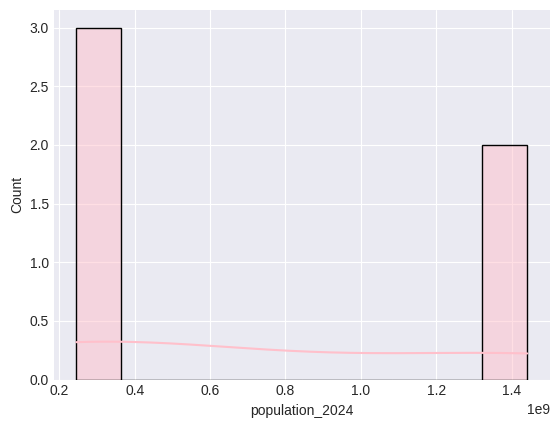

In [71]:
# Histogram
sns.histplot(countrylive_data.head()['population_2024'], bins=10, kde=True, color='pink')

<ipython-input-77-ba4c4184800b>:2: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(data=countrylive_data['land_area'], shade=True)


<Axes: xlabel='land_area', ylabel='Density'>

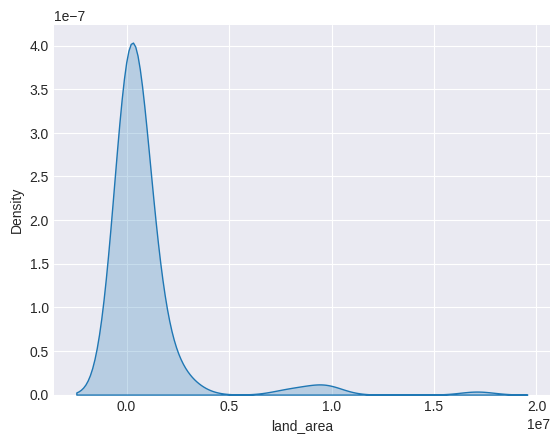

In [77]:
# KDE plot
sns.kdeplot(data=countrylive_data['land_area'], shade=True)

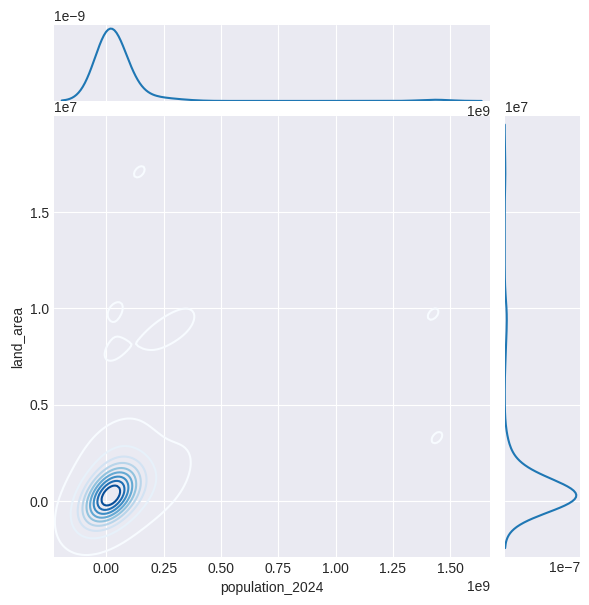

In [78]:
sns.jointplot(x=countrylive_data['population_2024'], y=countrylive_data['land_area'], kind="kde", cmap="Blues")

Text(0.5, 1.0, 'population of each country')

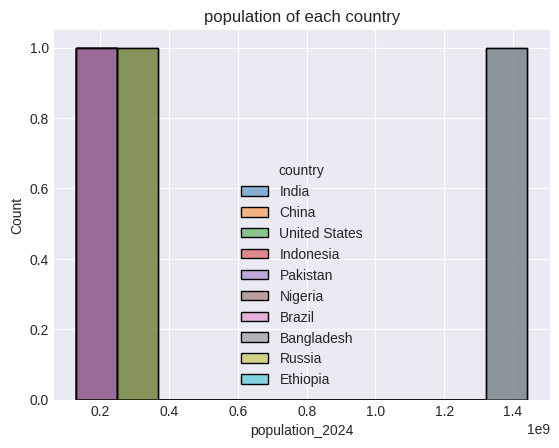

In [80]:
# Histograms for each species
sns.histplot(data=countrylive_data.head(10), x='population_2024', hue='country')

# Add title
plt.title("population of each country")

<ipython-input-84-00d300205d28>:2: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(data=countrylive_data.tail(15), x='population_density', hue='region', shade=True)
<ipython-input-84-00d300205d28>:2: UserWarning: Dataset has 0 variance; skipping density estimate. Pass `warn_singular=False` to disable this warning.
  sns.kdeplot(data=countrylive_data.tail(15), x='population_density', hue='region', shade=True)


Text(0.5, 1.0, 'land area of each country')

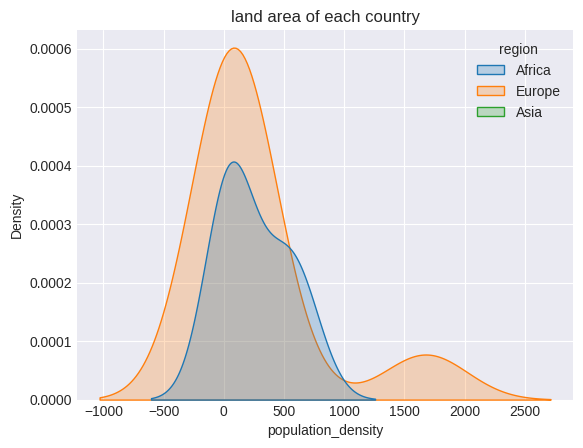

In [84]:
# KDE plots for each species
sns.kdeplot(data=countrylive_data.tail(15), x='population_density', hue='region', shade=True)

# Add title
plt.title("land area of each country")